## CNN: CIFAR10 소형 이미지 분류

[keras dataset](https://keras.io/ko/datasets/#cifar10)

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [3]:
# 데이터 로드
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
# 데이터 형태 파악
print('train:',X_train.shape, y_train.shape)
print('test: ',X_test.shape, y_test.shape) 

train: (50000, 32, 32, 3) (50000, 1)
test:  (10000, 32, 32, 3) (10000, 1)


Train : 50000개의 데이터, size (32,32), 컬러 이미지 channel = 3

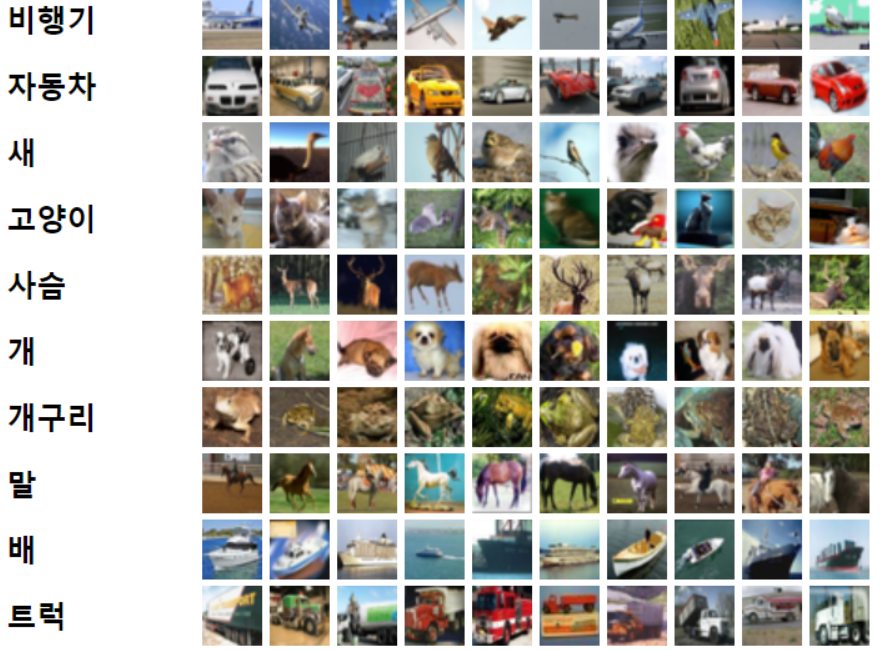

label:  [0]


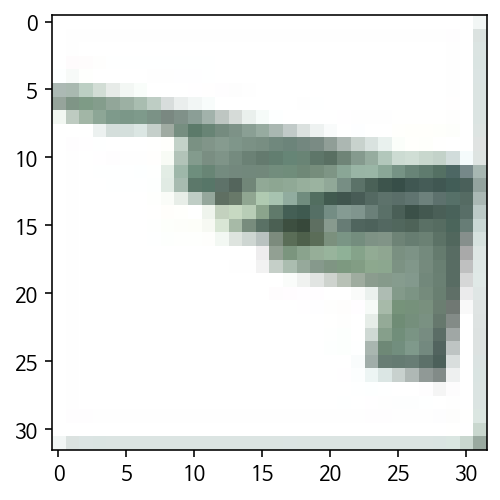

In [5]:
# 이미지 데이터 확인하기
from PIL import Image
import matplotlib.pyplot as plt
import cv2

plt.imshow(X_train[12345])
print('label: ', y_train[12345])

/anaconda/envs/py38_tensorflow/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

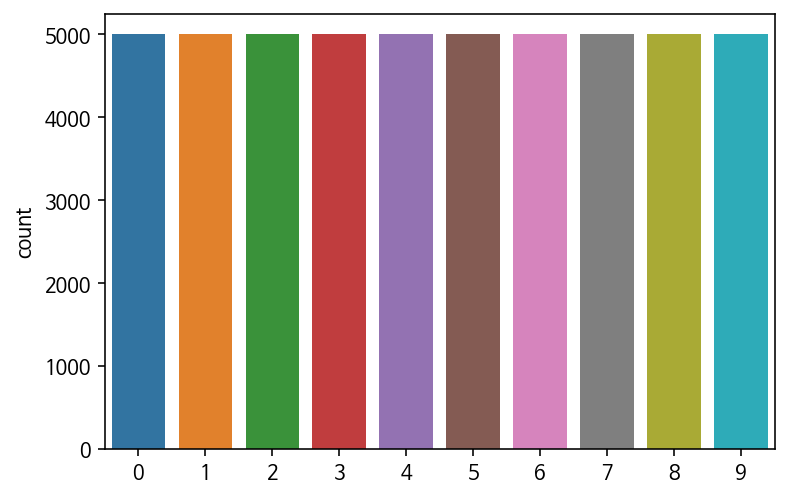

In [6]:
import seaborn as sns
sns.countplot(y_train.reshape(-1))

총 10개의 클래스로 각각 5000개의 데이터를 보유하고 있다.

In [7]:
# 3. 이미지 데이터 전처리 
import pandas as pd
pd.DataFrame(X_train.reshape(-1)).describe()

,0
count,1.536000e+08
mean,1.207076e+02
std,6.415008e+01
min,0.000000e+00
25%,7.000000e+01
50%,1.170000e+02
75%,1.670000e+02
max,2.550000e+02


In [8]:
X_train = X_train/255
X_test = X_test/255 

In [9]:
# 4. Label categorical (one-hot encoding) 
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train) 
y_test = to_categorical(y_test) 

In [31]:
# 5. 모델 생성 : CNN
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [90]:
# model = keras.Sequential()

# model.add(Conv2D(filters = 64, kernel_size = (3,3),
#                 padding = 'same',
#                 strides = 2,
#                 activation = 'relu',
#                 input_shape= (32, 32, 3)))
# model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same',activation = 'relu'))
# model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same',activation = 'relu'))

# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Flatten())

# # MLP
# model.add(Dense(256, activation = 'relu'))
# model.add(Dense(128, activation = 'relu'))
# model.add(Dense(10, activation = 'softmax'))

# 5. 모델 생성 : CNN

# 모델 생성/레이어 쌓기
model = keras.Sequential()
model.add(layers.Conv2D(64, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 64)        

In [91]:
# 6. Compile - Optimizer, Loss function 설정
from tensorflow.keras.optimizers import Adam

adam = Adam()
model.compile(loss = 'categorical_crossentropy',
             optimizer = adam,
             metrics = ['accuracy'])

In [92]:
# 7. 모델 학습시키기
# early stopping
early_stopping = EarlyStopping(monitor = 'val_loss',   patience =10, restore_best_weights = True) 

# 베스트 모델 저장(.h5파일)
model_path = 'keras_house_model.h5'
model_checkpoint = ModelCheckpoint(filepath = model_path,
                                  monitor = 'val_loss')

# 7. 모델 학습시키기
batch_size = 128
epochs = 100
hist = model.fit(X_train, y_train,
                batch_size = batch_size,
                validation_split = 0.2,
                epochs = epochs,
                verbose = 1,
                callbacks = [early_stopping, model_checkpoint])

Epoch 1/100
313/313 [==============================] - 9s 26ms/step - loss: 1.9486 - accuracy: 0.2667 - val_loss: 1.5793 - val_accuracy: 0.4201
Epoch 2/100
313/313 [==============================] - 7s 24ms/step - loss: 1.4876 - accuracy: 0.4573 - val_loss: 1.2693 - val_accuracy: 0.5504
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 1.2463 - accuracy: 0.5573 - val_loss: 1.1343 - val_accuracy: 0.6002
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 1.0907 - accuracy: 0.6205 - val_loss: 0.9175 - val_accuracy: 0.6738
Epoch 5/100
313/313 [==============================] - 7s 23ms/step - loss: 0.9717 - accuracy: 0.6689 - val_loss: 0.8696 - val_accuracy: 0.6955
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.8807 - accuracy: 0.6991 - val_loss: 0.7995 - val_accuracy: 0.7198
Epoch 7/100
313/313 [==============================] - 7s 23ms/step - loss: 0.8066 - accuracy: 0.7292 - val_loss: 0.7543 - val_accuracy:

In [94]:
# 8. 모델 평가하기
model.evaluate(X_train, y_train)
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7217 - accuracy: 0.7713


[0.7216664552688599, 0.7713000178337097]

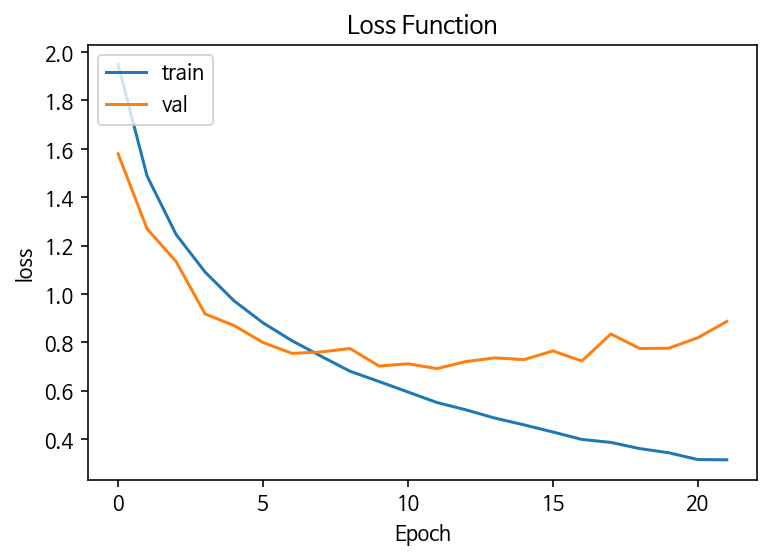

In [93]:
# loss 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc = 'upper left')
plt.title('Loss Function')
plt.show()

In [95]:
#label_kor = ['비행기', '자동차', '새', '고양이', '사슴', '개', '개구리', '말', '배', '트럭']
label_list = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

labels = dict(zip(range(10),label_list))

In [96]:
labels

{0: 'Airplane',
 1: 'Car',
 2: 'Bird',
 3: 'Cat',
 4: 'Deer',
 5: 'Dog',
 6: 'Frog',
 7: 'Horse',
 8: 'Ship',
 9: 'Truck'}

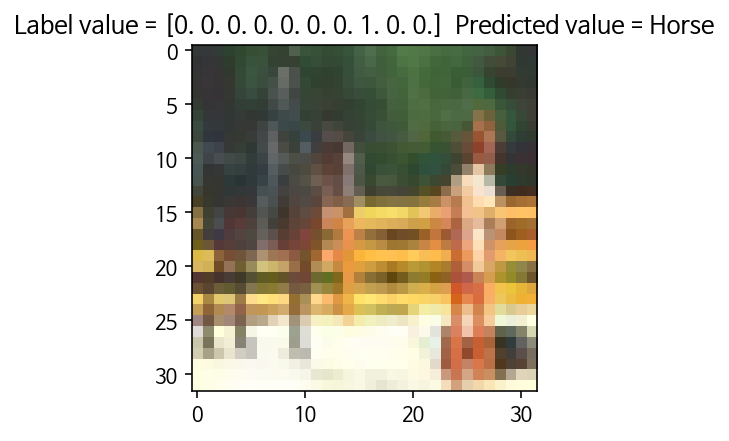

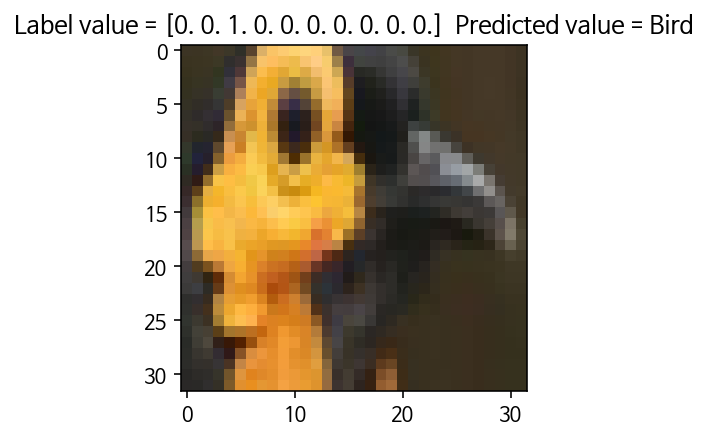

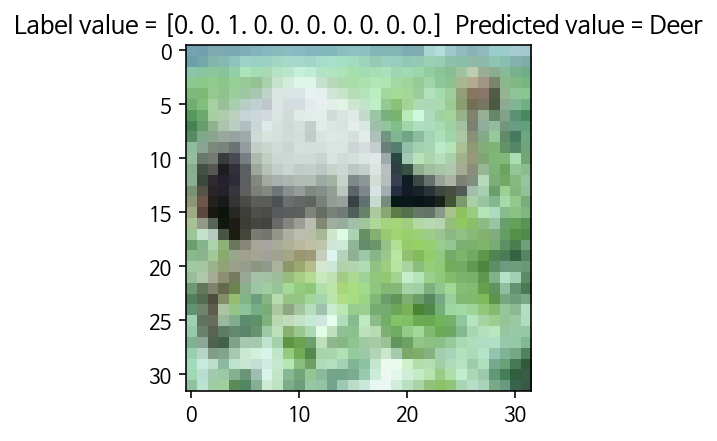

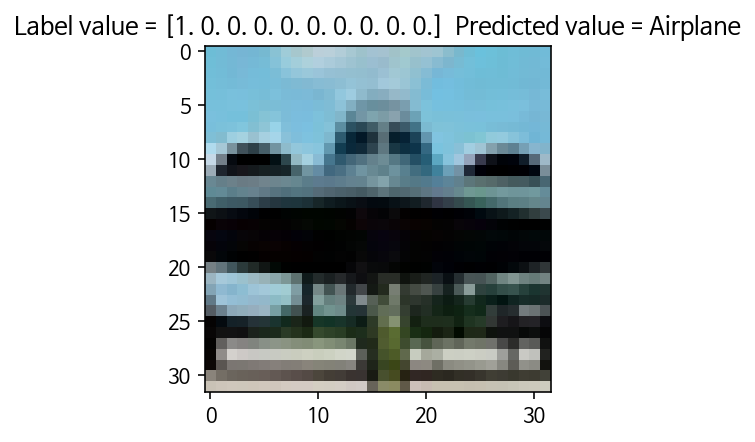

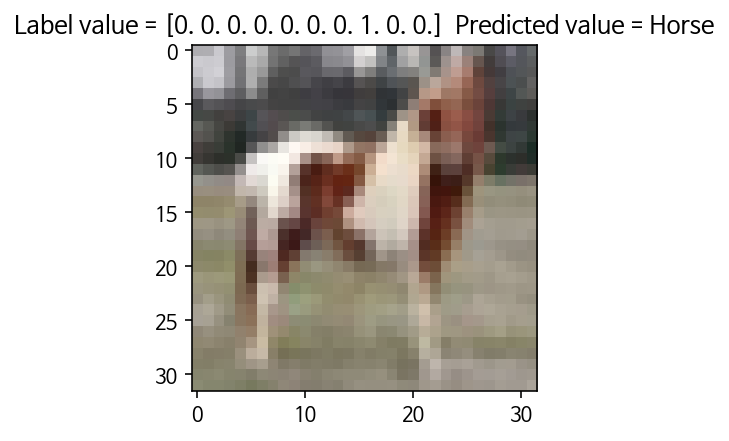

In [100]:
# 9. 이미지를 랜덤으로 선택해 훈련된 모델로 예측 🖼
import numpy as np
for index in np.random.choice(len(y_test), 5, replace = False): # y test 개수 만큼 중 4개
    test_image = X_test[index].reshape(1,X_test.shape[1],X_test.shape[2],3) # 3차원 -> 4차원
    predicted = model.predict(test_image)
    label = y_test[index]
    result_label = np.where(label == np.amax(label)) # amax : 배열의 가장 큰 수의 값, where : 조건에 해당되는 
    result_predicted = np.where(predicted == np.amax(predicted))
    title = f"Label value = {label}  Predicted value = {labels[result_predicted[1][0]]}"
    
    fig = plt.figure(1, figsize = (3,3))
    ax1 = fig.add_axes((0,0,.8,.8))
    ax1.set_title(title)
    images = X_test
    plt.imshow(images[index].reshape(32,32,3), cmap = plt.cm.gray, interpolation = 'nearest')
    plt.show()

In [50]:
model.save('cifar10_gpu_model.h5')